In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from plotter import P_over_E_parameter
from events import list_of_params
from functions import ic_params_nsi
from plotter import oscillogram

In [4]:
def list_of_params_nsi(dict,emm_range, ett_range):
    def update_dict(dict,p):
        dict2 = dict.copy()
        dict2.update(p)
        return dict2
    dict_list = [update_dict(dict,{'e_mm':mm, 'e_tt': tt}) for mm in emm_range for tt in ett_range]
    return dict_list

In [70]:
E_range = np.logspace(np.log10(500),4,50)
emm_range = [0,-0.1,0.1]#np.linspace(-1e-1,1e-1,3)
ett_range = [0,-0.1,0.1]#np.linspace(-1e-1,1e-1,3)
params = ic_params_nsi.copy()
anti=True
params.update({'theta_24': np.arcsin(np.sqrt(0.032)), 'dm_41':0.93, 'theta_34': np.arcsin(np.sqrt(0.032))})
nsi_params = list_of_params_nsi(params, emm_range, ett_range)
zenith = -0.8

Pmm_nsi = P_over_E_parameter('m',nsi_params,E=E_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(-1,)
Pmm = P_over_E_parameter('m',[params],E=E_range, ndim=4, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)
#Pmm_3gen = P_over_E_parameter('m',params,E=E_range, ndim=3, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)
Pmm_nsi=Pmm_nsi.reshape(len(emm_range)*len(ett_range),-1)

In [71]:
4*np.cos(2*params['theta_24'])*params['dm_41']*1/(1-2*np.array(emm_range))

array([3.482, 2.902, 4.352])

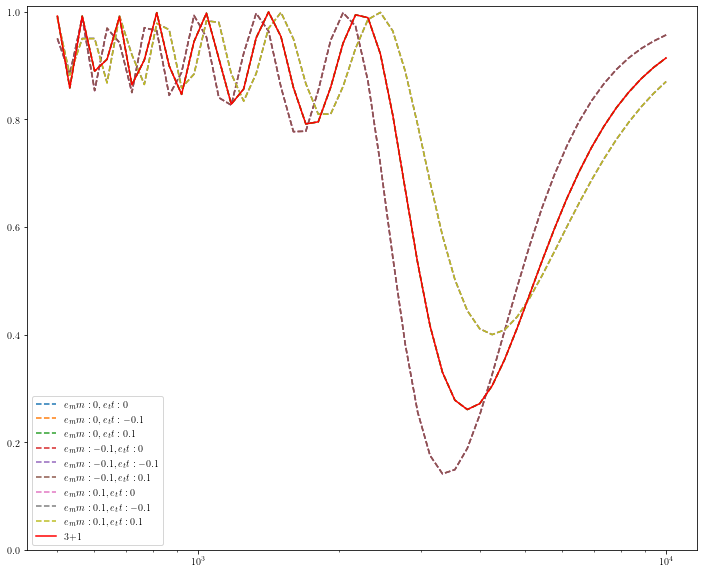

In [69]:
fig, ax = plt.subplots(1, figsize=(12,10))
#plt.plot(E_range, Pmm_3gen, label='$3 \\nu$', c='black', ls='dashed')
for p in range(Pmm_nsi.shape[0]):
    plt.plot(E_range, Pmm_nsi[p,:], ls='dashed', label=f'$e_mm: {np.round(nsi_params[p]["e_mm"],2)}, e_tt: {np.round(nsi_params[p]["e_tt"],2)}$')
plt.plot(E_range, Pmm, label='3+1',c='red')
plt.xscale('log')
plt.ylim((0,1.01))
plt.legend()


In [8]:
z_range = np.linspace(-1,0,50)
E_range = np.logspace(2,5,150)
params = ic_params.copy()
params.update({'theta_14': np.arcsin(np.sqrt(0)), 'theta_24': np.arcsin(np.sqrt(0.07))/2, 'dm_41':1.3})
P= oscillogram(E_range, z_range, params, nsi=False)

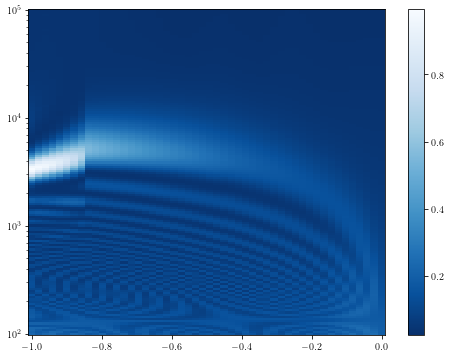

In [10]:
fig, ax = plt.subplots(1, figsize=(8,6))
c=ax.pcolormesh(z_range, E_range,P.T,cmap='Blues_r',edgecolor=None, shading = 'auto')
ax.set_yscale('log')
fig.colorbar(c, ax=ax)